In [140]:
#CSC/ECE/DA 427/527
#Fall 2020
from random import random
import matplotlib.pyplot as plt
import math
import numpy as np
def moon(num_points,distance,radius,width):

 points = num_points

 x1 = [0 for _ in range(points)]
 y1 = [0 for _ in range(points)]
 x2 = [0 for _ in range(points)]
 y2 = [0 for _ in range(points)]

 for i in range(points):
    d = distance
    r = radius
    w = width
    a = random()*math.pi
    x1[i] = math.sqrt(random()) * math.cos(a)*(w/2) + ((-(r+w/2) if(random() < 0.5) else (r+w/2)) * math.cos(a))
    y1[i] = math.sqrt(random()) * math.sin(a)*(w) + (r * math.sin(a)) - d
  
    a = random()*math.pi + math.pi
    x2[i] = (r+w/2) + math.sqrt(random()) * math.cos(a)*(w/2) + ((-(r+w/2)) if(random() < 0.5) else (r+w/2)) * math.cos(a)
    y2[i] = -(math.sqrt(random()) * math.sin(a)*(-w) + (-r * math.sin(a))) + d
 return ([x1,x2,y1,y2])



In [141]:
# generate cordinate of 2000 points
points = 1000
cord = moon(points,0,10,6)
cord2 = moon(2000,0,10,6)


In [147]:

#training dataset,testing dataset
# training dataset
x1,x2,y1,y2 = cord[0],cord[1],cord[2],cord[3]
# testing dataset
x3,x4,y3,y4 = cord2[0],cord2[1],cord2[2],cord2[3]
x5 = x1 + x2
y5 = y1 + y2
train_data1 = []
test_data = []
for i in range(len(x3)):
    a = [x3[i],y3[i],1]
    test_data.append(a)
for i in range(len(x4)):
    b = [x4[i],y4[i],-1]
    test_data.append(b)
test_data = np.asarray(test_data)
for i in range(len(x5)):
    c = [x5[i],y5[i],1]
    train_data1.append(c)
train_data1 = np.asarray(train_data1)
train_data1.size
np.random.shuffle(train_data1)

In [148]:
def sgnFunc(x, w):
    
    #Signum function, return 1 if sum(w*x)+b >= 0 else return -1
 

    activation = w[0]
    for i in range(2):
        activation += sum([i * j for i, j in zip(w[1:],x[0:2])])
    if activation >= 0:
        return 1
    else:
        return -1

def draw_line(w, data):
    '''
    Draw decision boundary
    w0 + w1x + w2y = 0 => y = -(w0 + w1x)/w2
    '''

    x = np.linspace(np.amin(data),np.amax(data),100)

   # x = np.linspace(-10,10, 100)
    y = -(w[0] + x*w[1])/w[2]
    plt.plot(x, y, '--k',label="DB")

In [149]:
# Using regularized least squares with lambda = 0.01 to calculate weight vector
w = np.linalg.inv((train_data1.T.dot(train_data1)) + (0.01 * np.identity(3))).dot(train_data1.T.dot(y_true))
w = np.reshape(w,(1,3))

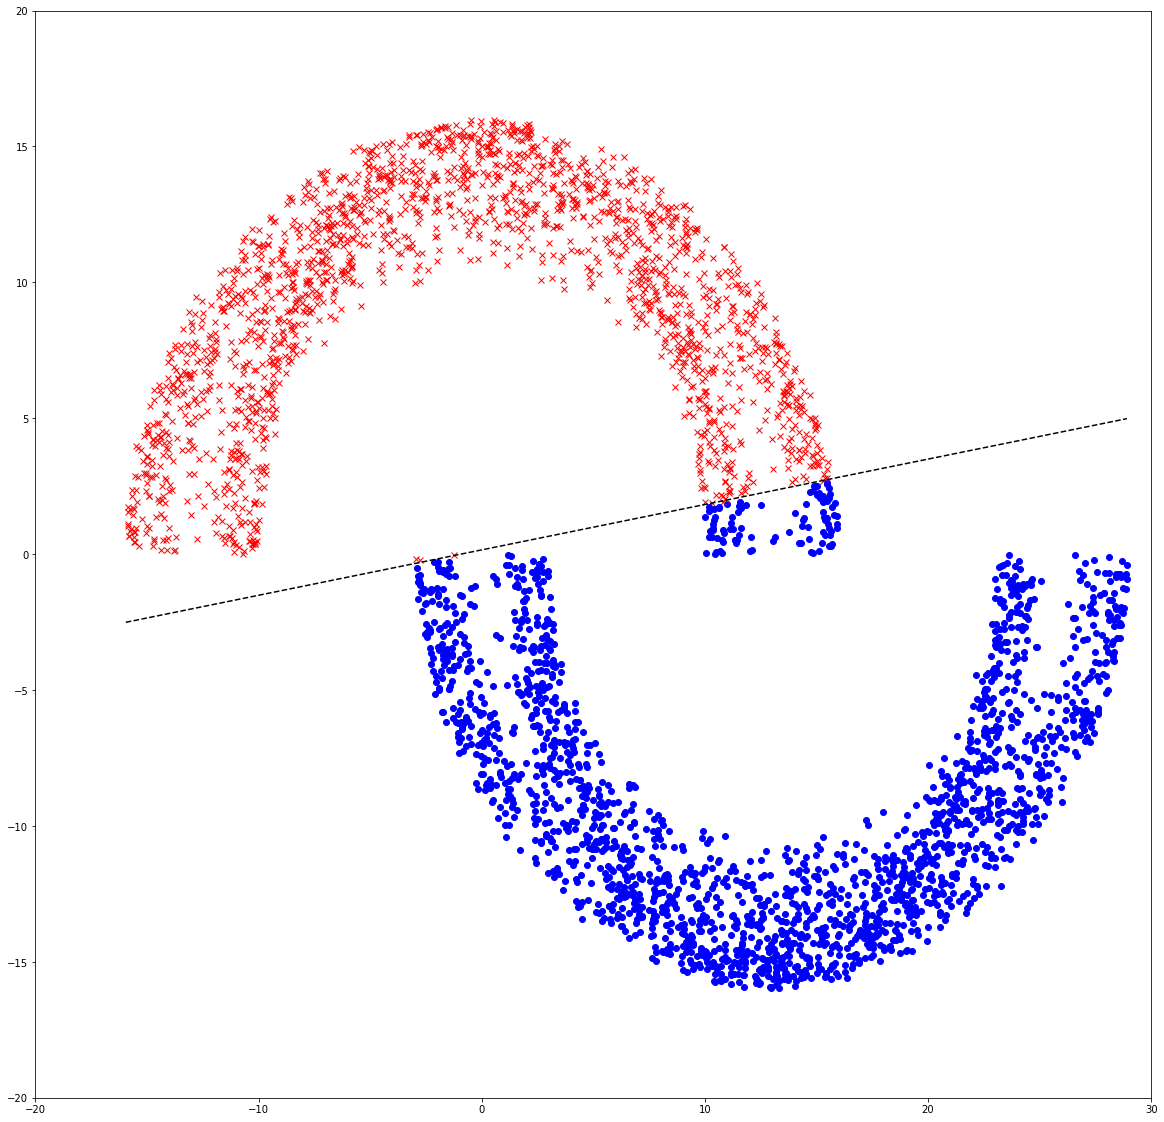

In [150]:
# Decision boundary
point = []
y_true2 = []
for x in test_data:
    plt.figure(1,figsize=(20,20))
    predict = sgnFunc(x, w[0])
    if predict == 1:
        plt.plot(x[0], x[1], marker='x', color='r',label="bl")
    else:
        plt.plot(x[0], x[1], marker='o', color='b',label='rd')
    y_true2.append(x[2])
    point.append(predict)

draw_line(w[0], test_data)
plt.axis([-20, 30, -20, 20])
plt.show()
